In [21]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import nltk as nltk
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords


# Input data files are in  read-only "../input/" directory

import os
for dirname, _, filenames in os.walk(r'C:\Users\Taha Gandhi\Desktop\Desktop\ML\Prj\input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:\Users\Taha Gandhi\Desktop\Desktop\ML\Prj\input\sample_submission_data.csv
C:\Users\Taha Gandhi\Desktop\Desktop\ML\Prj\input\test_data.csv
C:\Users\Taha Gandhi\Desktop\Desktop\ML\Prj\input\test_labels_data.csv
C:\Users\Taha Gandhi\Desktop\Desktop\ML\Prj\input\train_data.csv
C:\Users\Taha Gandhi\Desktop\Desktop\ML\Prj\input\Pretrained\glove.6B.100d.txt
C:\Users\Taha Gandhi\Desktop\Desktop\ML\Prj\input\Pretrained\glove.6B.200d.txt
C:\Users\Taha Gandhi\Desktop\Desktop\ML\Prj\input\Pretrained\glove.6B.300d.txt
C:\Users\Taha Gandhi\Desktop\Desktop\ML\Prj\input\Pretrained\glove.6B.50d.txt
C:\Users\Taha Gandhi\Desktop\Desktop\ML\Prj\input\Pretrained\GoogleNews-vec_neg.bin


In [22]:
df = pd.read_csv(r'C:\Users\Taha Gandhi\Desktop\Desktop\ML\Prj\input\train_data.csv')
rslt_df = df[(df['toxic'] == 0) & (df['severe_toxic'] == 0) & (df['obscene'] == 0) & (df['threat'] == 0) & (df['insult'] == 0) & (df['identity_hate'] == 0)]
rslt_df2 = df[(df['toxic'] == 1) & (df['severe_toxic'] == 0) & (df['obscene'] == 0) & (df['threat'] == 0) & (df['insult'] == 0) & (df['identity_hate'] == 0)]
new1 = rslt_df[['id', 'comment_text', 'toxic']].iloc[:23000].copy() 
new2 = rslt_df2[['id', 'comment_text', 'toxic']].iloc[:900].copy()
new = pd.concat([new1, new2], ignore_index=True)

In [23]:
new.head(10)

,id,comment_text,toxic
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0
6,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0
7,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0
8,00040093b2687caa,alignment on this subject and which are contra...,0
9,0005300084f90edc,"""\nFair use rationale for Image:Wonju.jpg\n\nT...",0


In [24]:
output=['toxic','severe_toxic','obscene','threat','insult','identity_hate']

Text(0.5, 1.0, 'Count of labels')

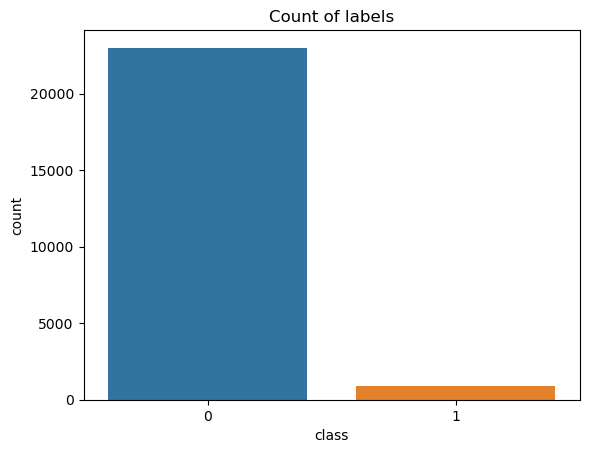

In [25]:
sns.countplot(x=new.toxic)
plt.xlabel('class')
plt.title('Count of labels')

In [26]:
# As we can see data is skewed therefore we will oversample it.
tk=nltk.tokenize.TreebankWordTokenizer()
comment_tokens = [tk.tokenize(sent) for sent in new['comment_text']]

In [27]:
len(comment_tokens)

23900

In [28]:
from nltk.corpus import stopwords
for i in range(len(comment_tokens)):
    comment_tokens[i] = [w for w in comment_tokens[i] if w not in stopwords.words('english')]

In [29]:
import gensim
# using pretrained model  
model = gensim.models.KeyedVectors.load_word2vec_format(r'C:\Users\Taha Gandhi\Desktop\Desktop\ML\Prj\input\Pretrained\GoogleNews-vec_neg.bin', binary=True)

In [30]:
vocabulary = model.key_to_index  
# using model to get length of vocabulary
len(vocabulary)

3000000

In [31]:
model.most_similar('fuck')

[('fucking', 0.8137821555137634),
 ('f_*_ck', 0.8011547327041626),
 ('f_**_k', 0.7815893888473511),
 ('shit', 0.7604621648788452),
 ('fucked', 0.7501130700111389),
 ('fuckin', 0.7309141755104065),
 ('f_***', 0.7172754406929016),
 ('f_ck', 0.7121477127075195),
 ('f_---', 0.7099311351776123),
 ('Fuck', 0.7066987156867981)]

In [51]:
# importing bokeh library for interactive dataviz
import bokeh.plotting as bp
from bokeh.models import HoverTool, BoxSelectTool
from bokeh.plotting import figure, show, output_notebook

# defining the chart
output_notebook()
plot_tfidf = bp.figure(plot_width=500, plot_height=400, title="It's a map of 10000 word vectors",
    tools="pan,wheel_zoom,box_zoom,reset,hover",
    x_axis_type=None, y_axis_type=None, min_border=1)

# getting a list of word vectors. limit to 10000. each is of 300 dimensions
word_vectors = [model[w] for w in list(model.key_to_index.keys())[:5000]]

# dimensionality reduction. converting the vectors to 2d vectors
from sklearn.manifold import TSNE
tsne_model = TSNE(n_components=2, verbose=1, random_state=0)
tsne_w2v = tsne_model.fit_transform(word_vectors)

# putting everything in a dataframe
tsne_df = pd.DataFrame(tsne_w2v, columns=['x', 'y'])
tsne_df['words'] = list(model.key_to_index.keys())[:5000]

# plotting. the corresponding word ppears when you hover on the data point.
plot_tfidf.scatter(x='x', y='y', source=tsne_df,color = 'darkorange')
hover = plot_tfidf.select(dict(type=HoverTool))
hover.tooltips={"word": "@words"}
show(plot_tfidf)

Loading BokehJS ...

C:\Users\Taha Gandhi\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Taha Gandhi\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.006s...
[t-SNE] Computed neighbors for 5000 samples in 0.864s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 0.913499
[t-SNE] KL divergence after 250 iterations with early exaggeration: 106.439049
[t-SNE] KL divergence after 1000 iterations: 2.411781


In [33]:
documents = []
for x in comment_tokens:
    document = [word for word in x if word in model.key_to_index]
    documents.append(document)

In [34]:
len(documents)

23900

In [35]:
type(documents)

list

In [36]:
#checking if there is any empty list inside documents
counter = 0
for i in range (0,len(documents)):
    if documents[i] == []:
        counter += 1
print(counter)

30


> So there were in total this much empty vectors(output of above cell) which were form due to removal of words whch are not present in our pretrained model's vocab, now we will fill those vectors with zeros

In [37]:
list_v=[]
for i in range (0,len(documents)):
    if documents[i] == []:
        list_v.append(np.zeros(300,))
    else:
        list_v.append(np.mean(model[documents[i]], axis=0))

In [38]:
len(list_v)

23900

In [39]:
from collections import Counter
print('Original dataset shape before smote %s' % Counter(new['toxic']))
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(list_v, new['toxic'])
print('Original dataset shape after smote %s' % Counter(y))

Original dataset shape before smote Counter({0: 23000, 1: 900})
Original dataset shape after smote Counter({0: 23000, 1: 23000})


In [40]:
#test-train split
from sklearn.model_selection import train_test_split
Xw_train, Xw_test, yw_train, yw_test = train_test_split(X,y, test_size=0.33, random_state=20, stratify=y)

In [41]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression(max_iter=100000)
clf.fit(Xw_train,yw_train)

LogisticRegression(max_iter=100000)

In [42]:
predicted_res=clf.predict(Xw_test)
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(yw_test,predicted_res)
accuracy

0.8822793148880106